# Matploylib and Seaborn

In [28]:
import numpy as np
import pandas as pd
from pylab import mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

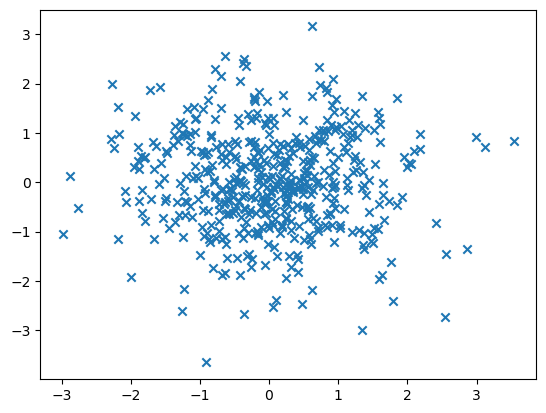

In [2]:
# 数据准备
N = 500
x = np.random.randn(N)
y = np.random.randn(N)

# 用 Matplotlib 画散点图
plt.scatter(x, y, marker='x')
plt.show()

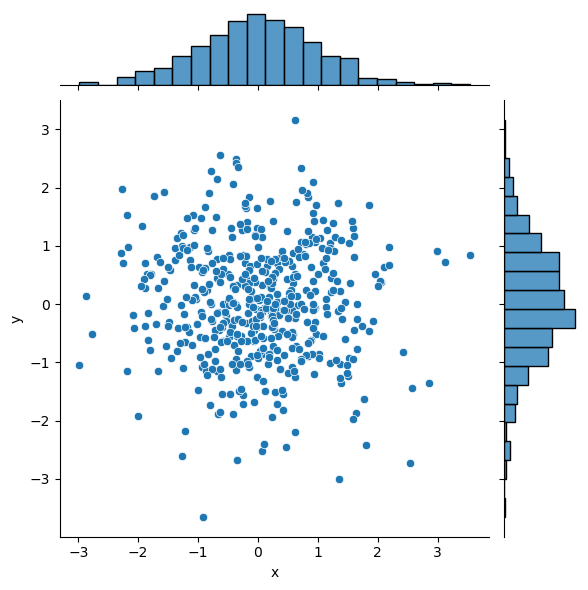

In [3]:
# 用 Seaborn 画散点图
df = pd.DataFrame({'x':x, 'y':y})
sns.jointplot(x='x', y='y', data=df, kind='scatter')
plt.show()

## 折线图

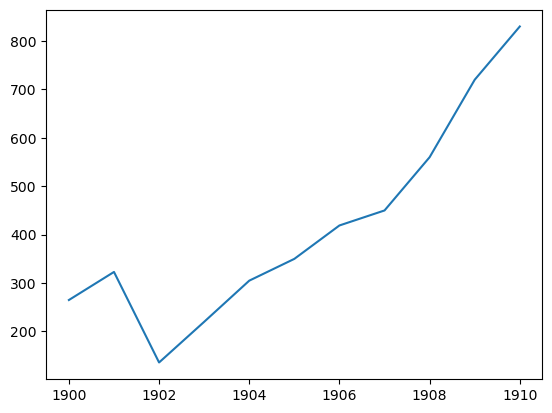

In [4]:

# 数据准备
x = [1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910]
y = [265, 323, 136, 220, 305, 350, 419, 450, 560, 720, 830]

# 使用 Matplotlib 画折线图
plt.plot(x, y)
plt.show()

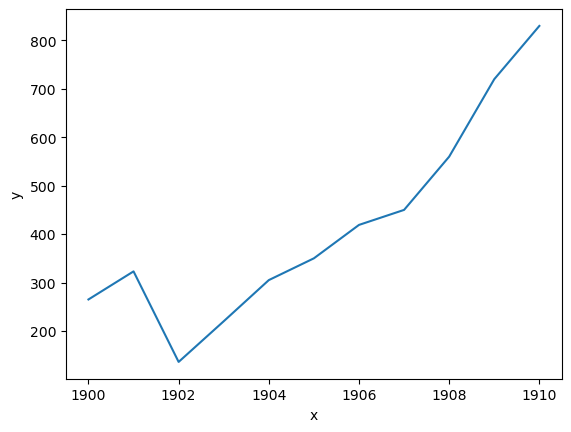

In [5]:
# 使用 Seaborn 画折线图
df = pd.DataFrame({'x':x, 'y':y})
sns.lineplot(x='x', y='y', data=df)
plt.show()

## 条形图

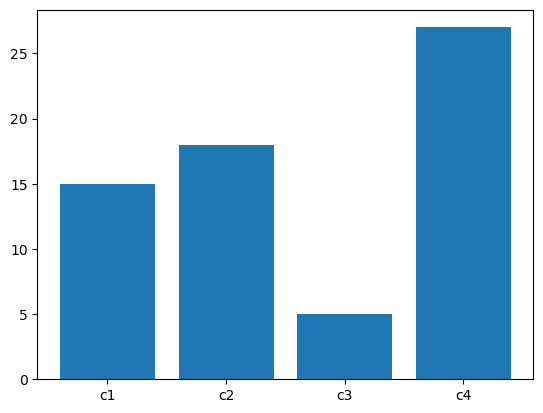

In [6]:
# 数据准备
x = ['c1', 'c2', 'c3', 'c4']
y = [15, 18, 5, 27]

# 用 plt 来画条形图
plt.bar(x, y)
plt.show()

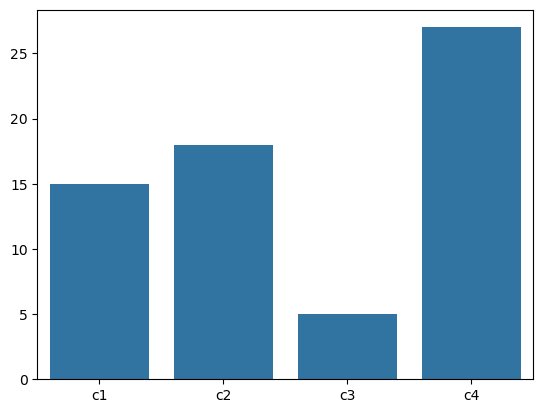

In [7]:
# 用 seaborn 来画条形图
sns.barplot(x=x, y=y)
plt.show()

## 箱线图

In [8]:
# 生成数据
# 生成 0-1 之间的 20*4 维度数据
data = np.random.normal(size=(10, 4))
labels = ['A', 'B', 'C', 'D']

In [9]:
data

array([[-1.00016173, -0.54686191, -0.2387455 ,  0.56657189],
       [ 0.82712535, -0.2956667 , -0.50577121, -0.35416521],
       [ 0.1404858 ,  1.01847794,  0.37644871, -2.0562783 ],
       [ 0.92112701,  0.42105005,  0.61599782, -0.55449676],
       [-0.8185437 ,  0.7004579 , -0.85290473,  0.73506761],
       [-0.17526721, -1.2235774 , -1.08995347, -0.42230065],
       [ 0.8992863 , -0.27766653,  0.41297994,  1.17134906],
       [-0.77040072, -1.39456904,  0.33450346,  1.17596714],
       [-0.27876435,  1.25877539, -2.20455758, -1.4926636 ],
       [-1.11359707, -1.92697788, -0.38687275, -0.28369198]])

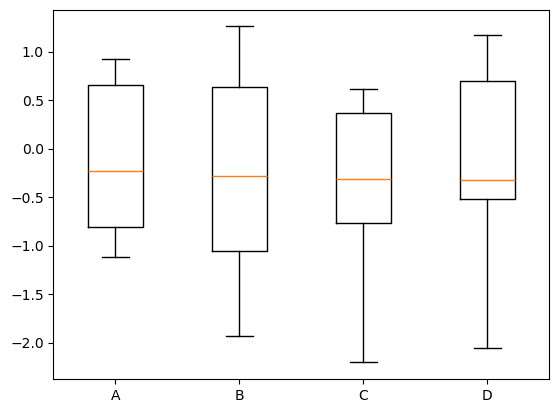

In [10]:
# 用 Matplotlib 画箱线图
plt.boxplot(data, labels=labels)
plt.show()

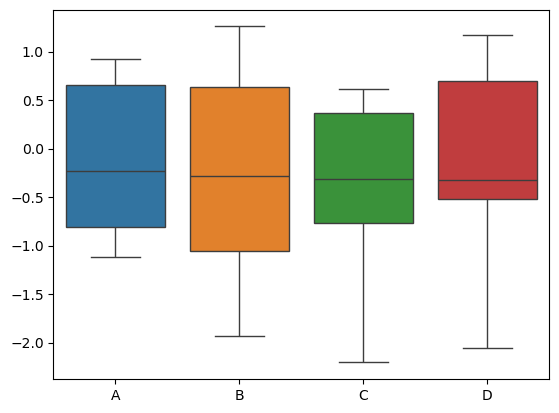

In [11]:
# 用 Seaborn 画箱线图
df = pd.DataFrame(data, columns=labels)
sns.boxplot(data=df)
plt.show()

## 饼图

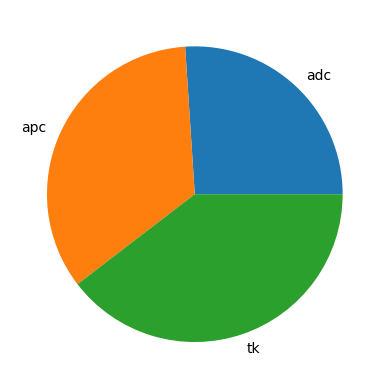

In [12]:
# 数据准备
nums = [25, 33, 38]

# 射手 adc, 法师 apc, 坦克 tk
labels = ['adc', 'apc', 'tk']

# 用 matplotlib 画饼图
plt.pie(x=nums, labels=labels)
plt.show()

## 热力图

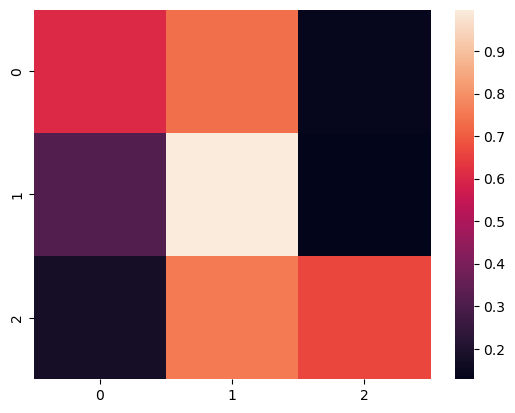

In [13]:
# 数据准备
np.random.seed(2021)
data = np.random.rand(3,3)

sns.heatmap(data)
plt.show()

## 雷达图

7 7


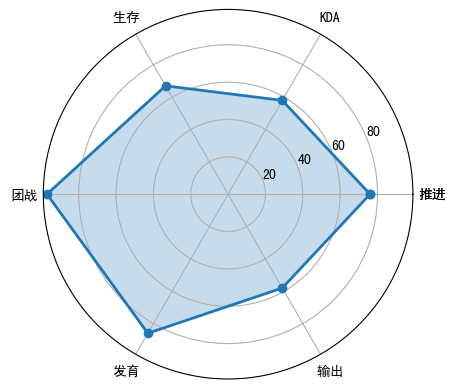

In [36]:
# 数据准备
labels = np.array([u'推进', 'KDA', u'生存', u'团战', u'发育', u'输出'])

stats = [76, 58, 67, 97, 86, 58]

# 画图数据准备，角度，状态值
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats = np.concatenate((stats, [stats[0]]))
angles = np.concatenate((angles, [angles[0]]))
labels = np.concatenate((labels, [labels[0]]))

# 检查角度和标签的数量是否相同
print(len(angles), len(labels))  

# 设置中文字体
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像负号'-'显示为方块的问题

# 用 matplotlib 画雷达图
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles*180/np.pi, labels)
plt.show()

## 二元分布图

In [39]:
# 数据准备
flights = sns.load_dataset('flights')
flights.info()
flights

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


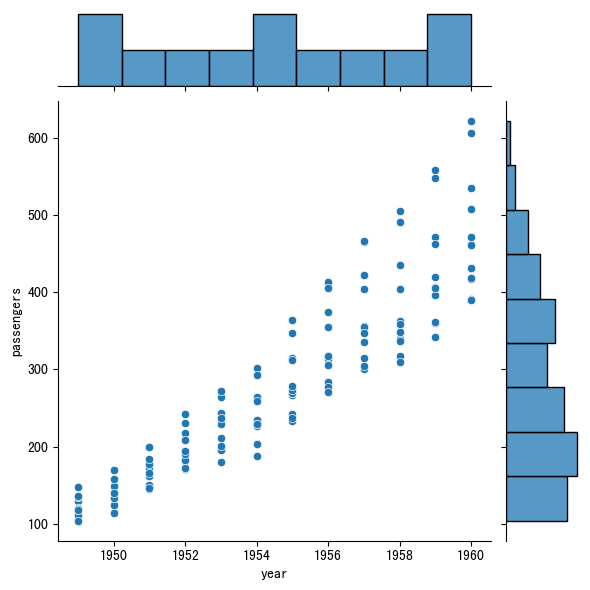

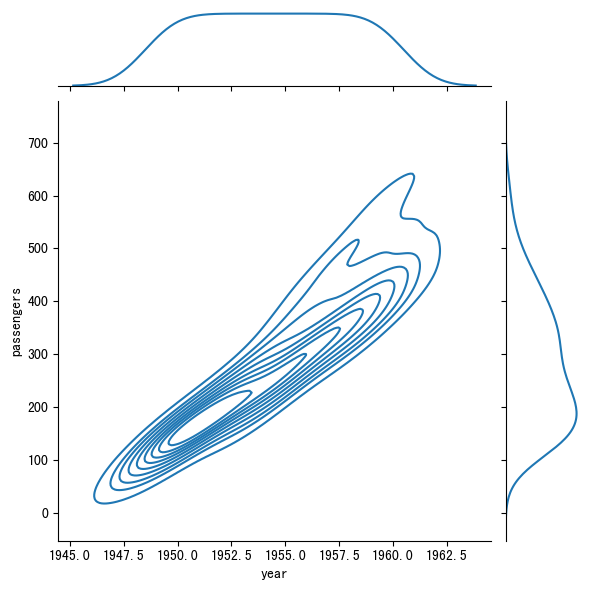

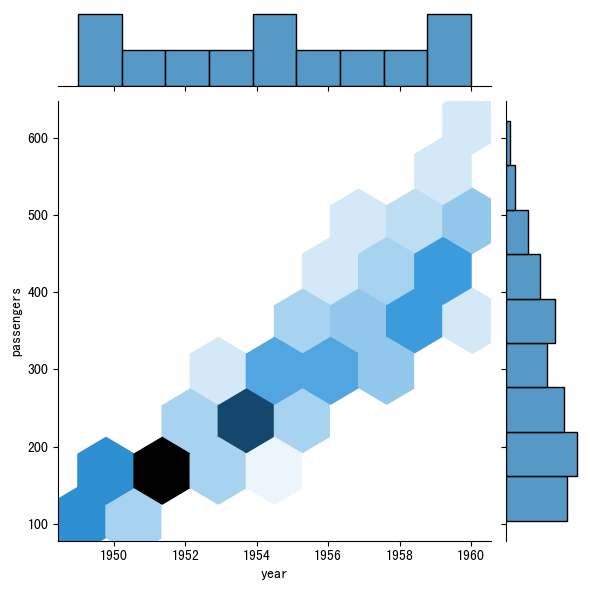

In [40]:
# 用 Seaborn 画二元变量分布图（散点图，核密度图，Hexbin 图）
sns.jointplot(x='year', y='passengers', data=flights, kind='scatter')
sns.jointplot(x='year', y='passengers', data=flights, kind='kde')
sns.jointplot(x='year', y='passengers', data=flights, kind='hex')
plt.show()

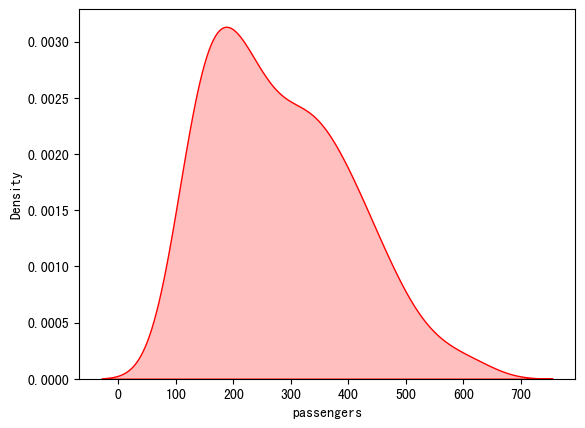

In [42]:
# 查看 passengers 的分布情况（一元分布）
sns.kdeplot(flights['passengers'], color='red', fill=True)
plt.show()

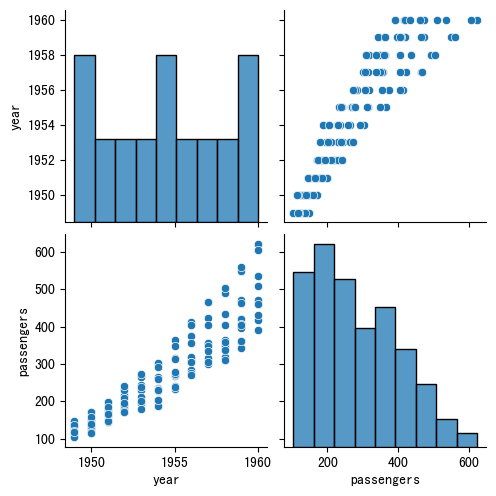

In [51]:
# seaborn 画成对的关系
sns.pairplot(flights)
plt.show()

## subplot

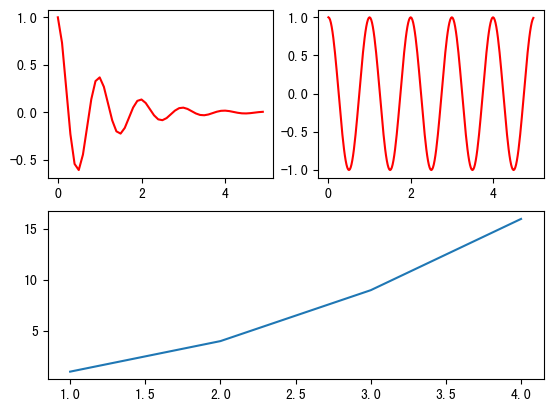

In [104]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0, 5, 0.1)
t2 = np.arange(0, 5, 0.02)

plt.figure()
plt.subplot(221)
plt.plot(t1, f(t1), 'r-')
plt.subplot(222)
plt.plot(t2, np.cos(2*np.pi*t2), 'r-')
plt.subplot(212)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()
